<h1 style="color:RED;" align="center">  Forecasting Future Sales Using ARIMA and SARIMAX </h1>

### ARIMA and Seasonal ARIMA
#### Autoregressive Integrated Moving Averages
- The general process for ARIMA models is the following:



1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions
6. Let's go through these steps!

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df=pd.read_csv(r"E:\DS &AI\Time Series\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne.csv")
df.head()

Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0

In [81]:
df.tail()

Month  \
102                                            1972-07   
103                                            1972-08   
104                                            1972-09   
105                                                NaN   
106  Perrin Freres monthly champagne sales millions...   

     Perrin Freres monthly champagne sales millions ?64-?72  
102                                             4298.0       
103                                             1413.0       
104                                             5877.0       
105                                                NaN       
106                                                NaN

In [82]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [83]:

## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

Month   Sales
0  1964-01  2815.0
1  1964-02  2672.0
2  1964-03  2755.0
3  1964-04  2721.0
4  1964-05  2946.0

In [84]:

## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.tail()

Month   Sales
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0
105      NaN     NaN

In [85]:
## Drop last 2 rows
df.drop(105,axis=0,inplace=True)
df.tail()

Month   Sales
100  1972-05  4618.0
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0

In [86]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.head()

Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0

In [87]:
df.set_index('Month',inplace=True)

In [88]:
df.head()

Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0

In [89]:
df.describe()

Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000

### Step 2: Visualize the Data

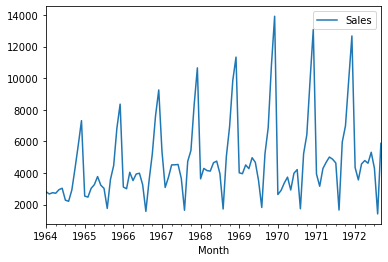

In [90]:
df.plot(kind="line")

In [91]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [92]:
test_result=adfuller(df['Sales'])

In [93]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [94]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276186
p-value : 0.36391577166024713
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [95]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [96]:

df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [97]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [98]:
df.head(15)

Sales  Sales First Difference  Seasonal First Difference
Month                                                                
1964-01-01  2815.0                     NaN                        NaN
1964-02-01  2672.0                  -143.0                        NaN
1964-03-01  2755.0                    83.0                        NaN
1964-04-01  2721.0                   -34.0                        NaN
1964-05-01  2946.0                   225.0                        NaN
1964-06-01  3036.0                    90.0                        NaN
1964-07-01  2282.0                  -754.0                        NaN
1964-08-01  2212.0                   -70.0                        NaN
1964-09-01  2922.0                   710.0                        NaN
1964-10-01  4301.0                  1379.0                        NaN
1964-11-01  5764.0                  1463.0                        NaN
1964-12-01  7312.0                  1548.0                        NaN
1965-01-01  2541.0                 -4771.0                     -274.0
1965-02-01  2475.0                   -66.0                     -197.0
1965-03-01  3031.0                   556.0                      276.0

In [99]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


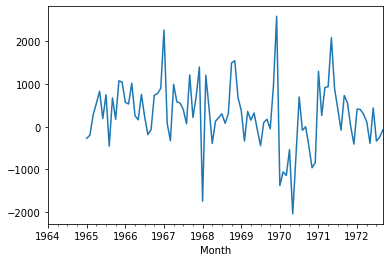

In [100]:
df['Seasonal First Difference'].plot()

### Auto Regressive Model

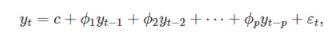

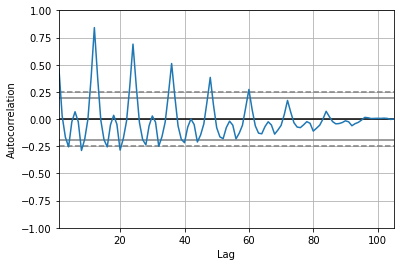

In [101]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation
  -  Identification of an AR model is often best done with the PACF.
     - For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.    
     **(Exponential Decrese)
     
  -  Identification of an MA model is often best done with the ACF rather than the PACF.

     - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.   
     **( Sudden decrease to Zero)

p,q,d 
   - p is  AR model lags 
   - q is MA lags
   - d is differencing 
  

In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

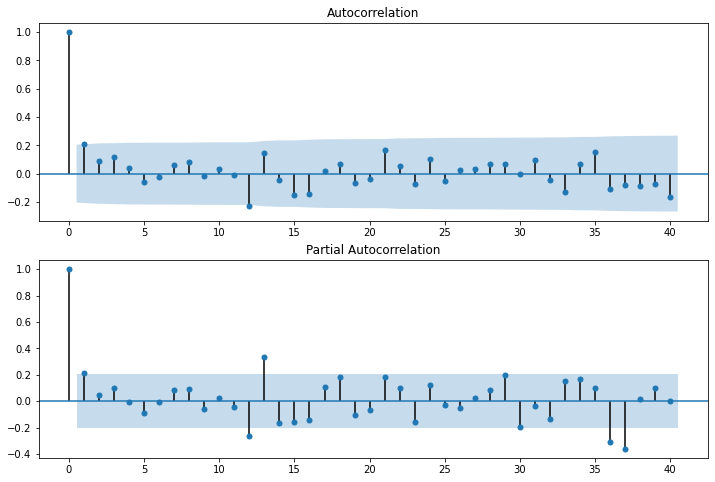

In [103]:

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)## for Auto correlation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)## ## for Partial Auto correlation

In [104]:
# For non-seasonal data
## ARIMA is use when data is Seasonal 
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [105]:

model=ARIMA(df['Sales'],order=(1,1,1))## p,d & q
model_fit=model.fit()

C:\Users\welcome\.spyder-py3\anaconda64bit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\welcome\.spyder-py3\anaconda64bit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [106]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 01 May 2021   AIC                           1910.251
Time:                        14:27:32   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7847     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

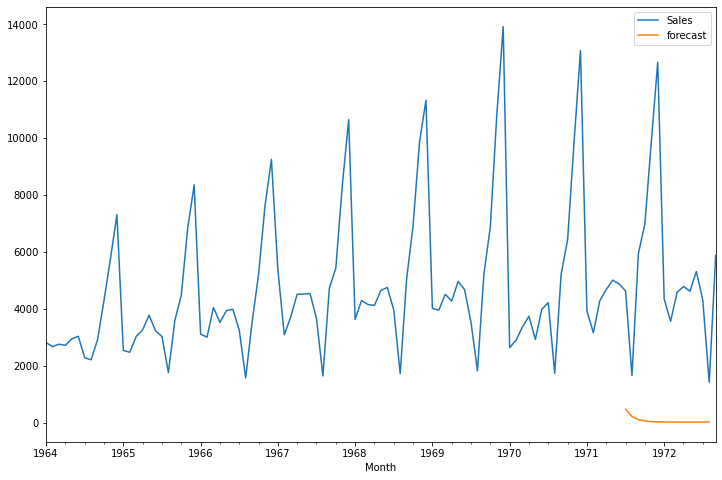

In [107]:

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [108]:
out = model.plot_diagnostics()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

In [109]:
import statsmodels.api as sm

In [110]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) ### p,d,q & Shift value
results=model.fit()

C:\Users\welcome\.spyder-py3\anaconda64bit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\welcome\.spyder-py3\anaconda64bit\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


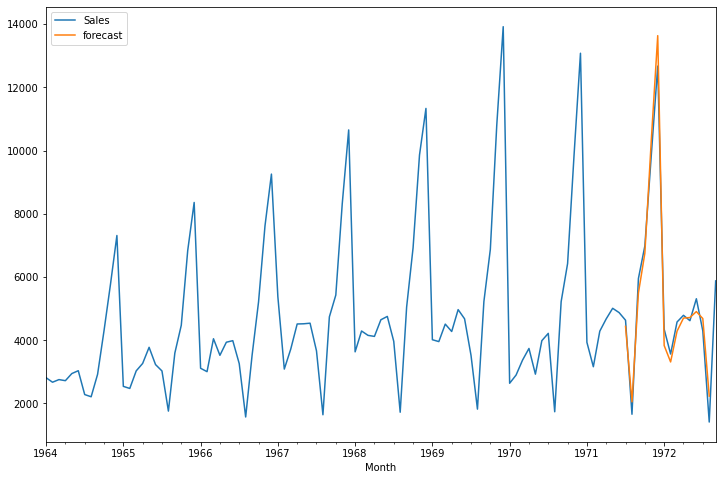

In [111]:

df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [112]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,18)]

In [113]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [114]:
future_datest_df.tail()

Sales Sales First Difference Seasonal First Difference forecast
1973-10-01   NaN                    NaN                       NaN      NaN
1973-11-01   NaN                    NaN                       NaN      NaN
1973-12-01   NaN                    NaN                       NaN      NaN
1974-01-01   NaN                    NaN                       NaN      NaN
1974-02-01   NaN                    NaN                       NaN      NaN

In [115]:
future_df=pd.concat([df,future_datest_df])
future_df.head()

Sales  Sales First Difference  Seasonal First Difference  \
1964-01-01  2815.0                     NaN                        NaN   
1964-02-01  2672.0                  -143.0                        NaN   
1964-03-01  2755.0                    83.0                        NaN   
1964-04-01  2721.0                   -34.0                        NaN   
1964-05-01  2946.0                   225.0                        NaN   

            forecast  
1964-01-01       NaN  
1964-02-01       NaN  
1964-03-01       NaN  
1964-04-01       NaN  
1964-05-01       NaN

In [116]:

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df['forecast'] 

1964-01-01             NaN
1964-02-01             NaN
1964-03-01             NaN
1964-04-01             NaN
1964-05-01             NaN
                  ...     
1973-10-01     7262.516694
1973-11-01    10194.738729
1973-12-01    13057.414635
1974-01-01     4731.202414
1974-02-01             NaN
Name: forecast, Length: 122, dtype: float64

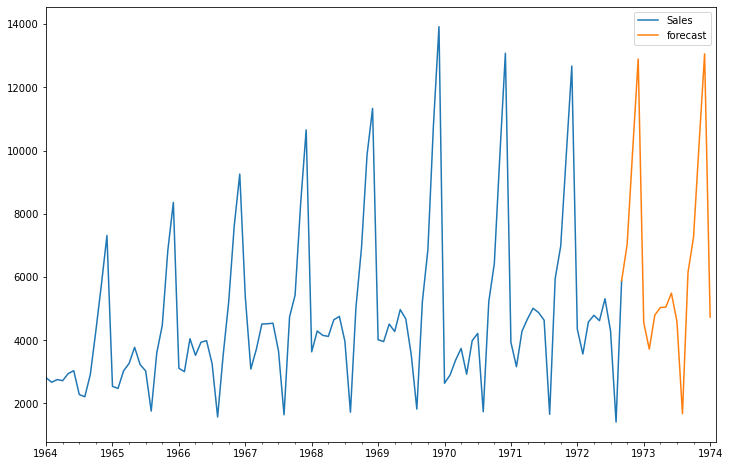

In [117]:

future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [118]:
future_df[['Sales', 'forecast']]

Sales      forecast
1964-01-01  2815.0           NaN
1964-02-01  2672.0           NaN
1964-03-01  2755.0           NaN
1964-04-01  2721.0           NaN
1964-05-01  2946.0           NaN
...            ...           ...
1973-10-01     NaN   7262.516694
1973-11-01     NaN  10194.738729
1973-12-01     NaN  13057.414635
1974-01-01     NaN   4731.202414
1974-02-01     NaN           NaN

[122 rows x 2 columns]

<h1 style="color:Green;" align="center">  THE END </h1>